<a href="https://colab.research.google.com/github/wangdaming155/dive-into-deep-learning2/blob/main/%E6%9A%82%E9%80%80%E6%B3%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os 
os.chdir('/content/drive/MyDrive/d2l-zh')

In [4]:
import torch
from torch import nn
from d2l import torch as d2l


In [14]:
def dropout_layer(X,dropout):
  assert 0<=dropout<=1
  #基本情况下，所有的元素都被丢掉
  if dropout == 1:
    return torch.zeros_like(X)
  #在本情况下所有元素都被保留
  if dropout == 0:
    return X
  mask = (torch.rand(X.shape)>dropout).float()   #换句话说，大于的时候，mask=1，否则等于0

  return mask*X/(1.0-dropout)

In [15]:
X= torch.arange(16, dtype = torch.float32).reshape((2, 8))
print(X)
print(dropout_layer(X, 0.))
print(dropout_layer(X, 0.5))
print(dropout_layer(X, 1.))

tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11., 12., 13., 14., 15.]])
tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11., 12., 13., 14., 15.]])
tensor([[ 0.,  2.,  0.,  6.,  0.,  0.,  0.,  0.],
        [ 0., 18., 20.,  0.,  0., 26., 28.,  0.]])
tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])


In [21]:
#定义模型参数
num_inputs,num_outputs,num_hiddens1,num_hiddens2 = 784,10,256,256


In [22]:
dropout1, dropout2 = 0.2, 0.5

class Net(nn.Module):
    def __init__(self, num_inputs, num_outputs, num_hiddens1, num_hiddens2,
                 is_training = True):
        super(Net, self).__init__()
        self.num_inputs = num_inputs
        self.training = is_training
        self.lin1 = nn.Linear(num_inputs, num_hiddens1)
        self.lin2 = nn.Linear(num_hiddens1, num_hiddens2)
        self.lin3 = nn.Linear(num_hiddens2, num_outputs)
        self.relu = nn.ReLU()

    def forward(self, X):
        H1 = self.relu(self.lin1(X.reshape((-1, self.num_inputs))))
        # 只有在训练模型时才使用dropout
        if self.training == True:
            # 在第一个全连接层之后添加一个dropout层
            H1 = dropout_layer(H1, dropout1)
        H2 = self.relu(self.lin2(H1))
        if self.training == True:
            # 在第二个全连接层之后添加一个dropout层
            H2 = dropout_layer(H2, dropout2)
        out = self.lin3(H2)
        return out


net = Net(num_inputs, num_outputs, num_hiddens1, num_hiddens2)

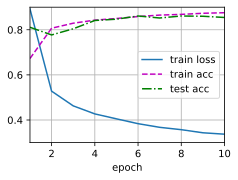

In [24]:
num_epochs, lr, batch_size = 10, 0.5, 256
loss = nn.CrossEntropyLoss(reduction='none')
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
trainer = torch.optim.SGD(net.parameters(), lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

In [29]:
from torch.nn.modules.linear import Linear
from torch.nn.modules.dropout import Dropout
#简洁实现
net = nn.Sequential(nn.Flatten(),nn.Linear(784,256),nn.ReLU(),
                    #添加dropout
                    nn.Dropout(dropout1),
                    nn.Linear(256,256),
                    nn.ReLU(),
                    #add another dropout
                    nn.Dropout(dropout2),
                    nn.Linear(256,10))

def init_weights(m):
  if type(m) == nn.Linear:
    nn.init.normal_(m.weight,std=0.01)

net.apply(init_weights)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Dropout(p=0.2, inplace=False)
  (4): Linear(in_features=256, out_features=256, bias=True)
  (5): ReLU()
  (6): Dropout(p=0.5, inplace=False)
  (7): Linear(in_features=256, out_features=10, bias=True)
)

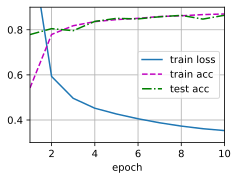

In [30]:
trainer = torch.optim.SGD(net.parameters(),lr=lr)
d2l.train_ch3(net,train_iter,test_iter,loss,num_epochs,trainer)

In [ ]:
# 梯度消失
%matplotlib inline
import torch
from d2l import torch as d2l



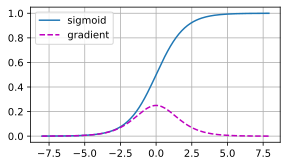

In [32]:
%matplotlib inline
import torch
from d2l import torch as d2l

x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.sigmoid(x)
y.backward(torch.ones_like(x))

d2l.plot(x.detach().numpy(), [y.detach().numpy(), x.grad.numpy()],
         legend=['sigmoid', 'gradient'], figsize=(4.5, 2.5))

In [33]:
M = torch.normal(0, 1, size=(4,4))
print('一个矩阵 \n',M)
for i in range(100):
    M = torch.mm(M,torch.normal(0, 1, size=(4, 4)))

print('乘以100个矩阵后\n', M)

一个矩阵 
 tensor([[ 0.6863,  0.5326, -0.4961,  0.7237],
        [-1.5466, -1.8854, -2.5764,  0.9449],
        [-0.0902, -0.0926, -1.5578,  0.7947],
        [-0.6845, -0.8086, -0.2761,  0.2449]])
乘以100个矩阵后
 tensor([[-5.7764e+20,  9.2226e+20,  8.3481e+20,  1.6384e+20],
        [-6.0921e+19,  9.7258e+19,  8.8013e+19,  1.7389e+19],
        [-5.5949e+20,  8.9328e+20,  8.0857e+20,  1.5874e+20],
        [ 2.7344e+20, -4.3658e+20, -3.9518e+20, -7.7546e+19]])
